In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
import os

repo_root = os.path.abspath(os.path.join(os.getcwd()))
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
    print(f"{repo_root} added to sys.path.")
else:
    print("Repo root already in sys.path.")

c:\Users\myuig\Documents\Music-AppliedML\Music-AppliedML added to sys.path.


In [3]:
from courselib.utils.loaders import load_or_download_csv

file_name1 = 'features_30_sec.csv'
#file_name2 = 'features_3_sec.csv'
url = 'https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download'
column_names = ['filename','length','chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','perceptr_mean','perceptr_var','tempo','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','label'
]

df_30 = load_or_download_csv(file_name1,url,column_names)
#df_3 = load_or_download_csv(file_name2,url,column_names)

Loading from local `features_30_sec.csv`...


In [4]:
df_30

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock


In [5]:
from courselib.models.base import TrainableModel
from courselib.models.svm import BinaryKernelSVM
from courselib.utils.preprocessing import labels_encoding
import numpy as np

class MulticlassKernelSVM_OVR(TrainableModel):
    def __init__(self, C=1.0, kernel='linear', **kwargs):
        super().__init__(optimizer=None)  # Not used for non-gradient model
        self.C = C
        self.kernel = kernel
        self.kwargs = kwargs
        self.classifiers = []
        self.classes = None

    def fit(self, X, Y, compute_metrics=False, metrics_dict=None):
        self.classes = np.unique(Y)
        Y_encoded = labels_encoding(Y, labels=self.classes, pos_value=1, neg_value=-1)

        self.classifiers = []
        for k in range(len(self.classes)):
            clf = BinaryKernelSVM(C=self.C, kernel=self.kernel, **self.kwargs)
            clf.fit(X, Y_encoded[:, k])
            self.classifiers.append(clf)

        # Evaluate metrics once after training
        if compute_metrics and metrics_dict:
            metrics = self.compute_metrics(X, Y_encoded, metrics_dict)
            return {k: [v] for k, v in metrics.items()}
        else:
            return None

    def decision_function(self, X):
        return np.column_stack([clf.decision_function(X) for clf in self.classifiers])

    def __call__(self, X):
        return self.classes[np.argmax(self.decision_function(X), axis=1)]

In [6]:
from courselib.utils.splits import train_test_split

features = ['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','perceptr_mean','perceptr_var','tempo','label']

X, Y, X_train, Y_train, X_test, Y_test =  train_test_split(df_30[features], training_data_fraction=0.8, class_column_name='label', return_numpy=True)

print('Training data split as follows:')
print(f'  Training data samples: {len(X_train)}')
print(f'      Test data samples: {len(X_test)}')

Training data split as follows:
  Training data samples: 800
      Test data samples: 200


In [10]:
X_test

array([[ 2.21140936e-01,  9.21519473e-02,  8.78012329e-02, ...,
         3.40803730e-04,  8.61655630e-04,  8.61328125e+01],
       [ 3.95211816e-01,  8.07546377e-02,  1.14732154e-01, ...,
        -2.41111126e-03,  2.85326596e-03,  1.23046875e+02],
       [ 4.88326818e-01,  7.24371672e-02,  1.75750360e-01, ...,
         2.37978227e-03,  7.59341614e-03,  1.35999178e+02],
       ...,
       [ 4.00411338e-01,  8.67208242e-02,  2.21757099e-01, ...,
        -5.48417811e-05,  1.69972982e-02,  9.22851562e+01],
       [ 4.73975331e-01,  7.75349811e-02,  1.91986457e-01, ...,
        -1.47220783e-03,  1.04226395e-02,  1.23046875e+02],
       [ 4.43506896e-01,  6.97187334e-02,  1.08283579e-01, ...,
        -1.24718317e-05,  1.88102538e-03,  1.43554688e+02]],
      shape=(200, 17))

In [19]:
import matplotlib.pyplot as plt

def plot_learning_curves2(metrics_history):
    plt.figure(figsize=(10, 6))
    for name, values in metrics_history.items():
        # Unpack single-element array wrapper if needed
        if len(values) == 1 and isinstance(values[0], np.ndarray):
            values = values[0]
        plt.plot(values, label=name)
    plt.xlabel("Training Step")
    plt.ylabel("Metric Value")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
def accuracy(y_pred, y_true, one_hot_encoded_labels=True):    
    if one_hot_encoded_labels:
        y_pred = np.argmax(y_pred,axis=-1)
        y_true = np.argmax(y_true,axis=-1)
    return np.mean(y_pred == y_true, axis=0) * 100

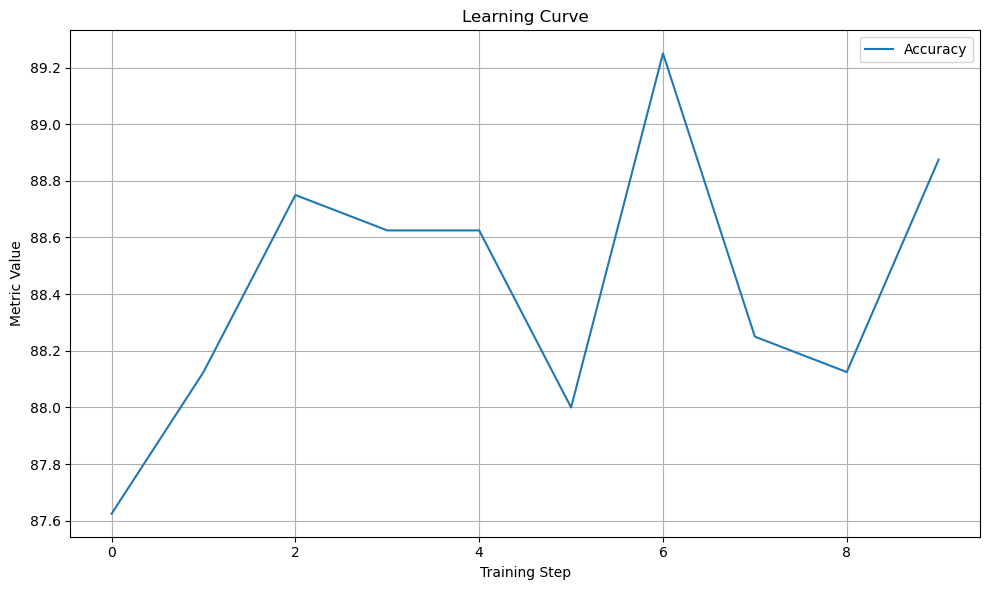

In [20]:
model = MulticlassKernelSVM_OVR(C=1.0, kernel='rbf', sigma=0.5)
metrics = {
    "Accuracy": lambda y_pred, y_true: accuracy(y_pred, y_true, one_hot_encoded_labels=False)
}
history = model.fit(X_train, Y_train, compute_metrics=True, metrics_dict=metrics)
plot_learning_curves2(history)

In [14]:
y_pred

NameError: name 'y_pred' is not defined

In [15]:
model

In [17]:
history

{'Accuracy': [array([87.625, 88.125, 88.75 , 88.625, 88.625, 88.   , 89.25 , 88.25 ,
         88.125, 88.875])]}